# NF1

<!-- Provide a brief overview of the syndrome and its genetic basis. Replace [Gene Name] and [Syndrome Name] with the specific gene and syndrome you are studying. -->

[Neurofibromatosis type 1]((https://omim.org/entry/162200)) is an autosomal dominant disorder characterized by cafe-au-lait spots, Lisch nodules, and fibromatous tumors of the skin. The syndrome is caused by pathogenic variants in the [NF1 gene](https://omim.org/entry/162200).


Several previous publications have reported candidate genotype-phenotype correlations in NF1.


[Rojnueangnit et al. (2015)](https://pubmed.ncbi.nlm.nih.gov/26178382/) reported five distinct missense variants affecting p.Arg1809. 

> Patients presented with multiple café-au-lait macules (CALM) with or without freckling and Lisch nodules, but no externally visible plexiform neurofibromas or clear cutaneous neurofibromas were found.

[Upadhyaya et al. (2007)](https://pubmed.ncbi.nlm.nih.gov/17160901/) stated that:

> We identified 21 unrelated probands with NF1 (14 familial and 7 sporadic cases) who were all found to have the same c.2970-2972 delAAT (p.990delM) mutation but no cutaneous neurofibromas or clinically obvious plexiform neurofibromas. 

[Pasmant et al. (2010)](https://pubmed.ncbi.nlm.nih.gov/20513137/) report:

> Genotype-phenotype correlations were studied in 58 of these microdeletion patients and compared to 389 patients with intragenic truncating NF1 mutations and phenotyped in the same standardized way. Our results confirmed in an unbiased manner the existence of a contiguous gene syndrome with a significantly higher incidence of learning disabilities and facial dysmorphism in microdeleted patients compared to patients with intragenic NF1 mutations. Microdeleted NF1 patients also showed a trend toward significance for childhood overgrowth. 


In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using genophenocorr version {gpsea.__version__}")

Loaded HPO v2025-01-16
Using genophenocorr version 0.9.4


# NF1
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for NF1.

In [2]:
from gpsea.preprocessing import configure_default_protein_metadata_service

gene_symbol = 'NF1'
mane_tx_id = 'NM_001042492.3'
mane_protein_id = "NP_001035957.1"
pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)

## Loading Phenopackets & Gene Variant Data
The prefered transcript can be found by searching on the gene symbol in [ClinVar](https://www.ncbi.nlm.nih.gov/clinvar/). By entering the accession number in [NCBI Nucleotide](https://www.ncbi.nlm.nih.gov/nuccore/?), you can find the corresponding protein accession number.

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

from ppktstore.registry import configure_phenopacket_registry
phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store("0.1.24") as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)

cohort, validation = load_phenopackets(phenopackets=phenopackets,
                                       cohort_creator=cohort_creator)

validation.summarize()

Individuals Processed: 100%|██████████| 419/419 [01:12<00:00,  5.77 individuals/s]
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer
cv = CohortViewer(hpo=hpo)
cv.process(cohort=cohort, transcript_id=mane_tx_id)

n,HPO Term
294,Multiple cafe-au-lait spots
146,Freckling
125,Axillary freckling
92,Inguinal freckling
83,Lisch nodules
80,Neurofibroma
68,Plexiform neurofibroma
56,Scoliosis
48,Few cafe-au-lait spots
39,Optic nerve glioma


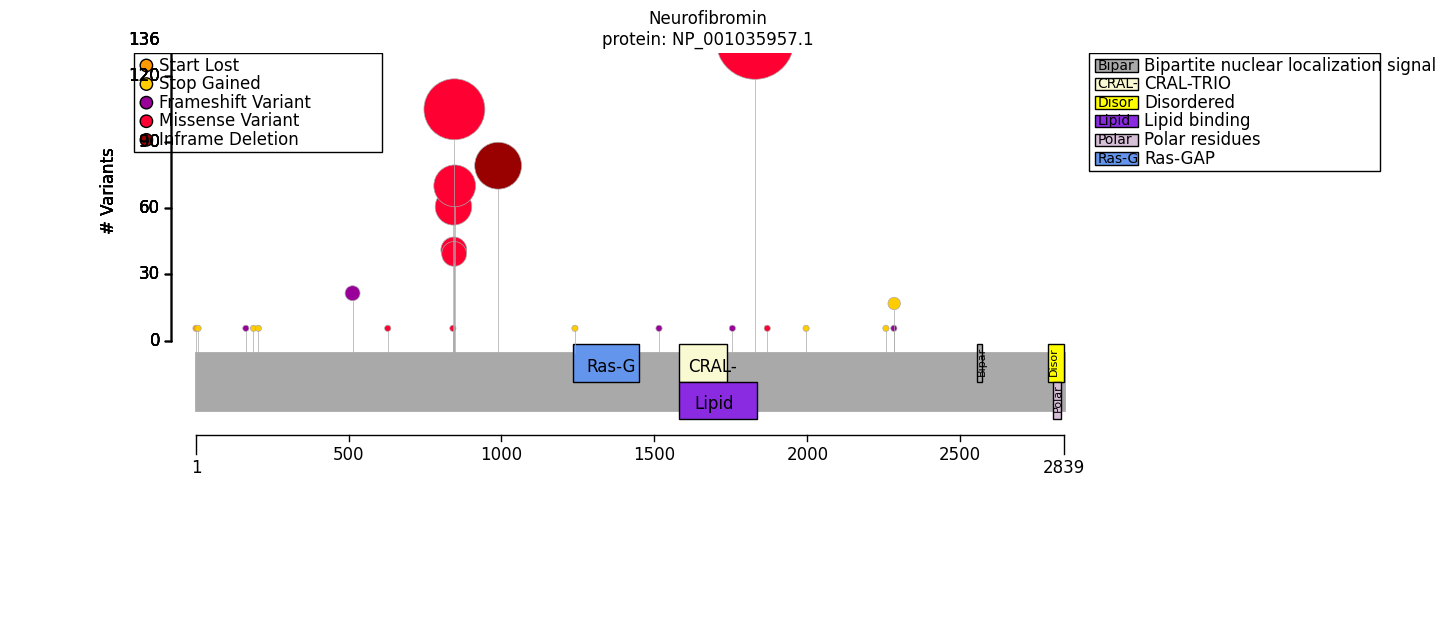

In [5]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

nf1_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein(
    protein_metadata=protein_meta,
    cohort=cohort,
    ax=ax,
)
nf1_fig.tight_layout()

In [6]:
from gpsea.view import ProteinVariantViewer
viewer = ProteinVariantViewer(protein_metadata=protein_meta, tx_id=mane_tx_id)
viewer.process(cohort)

Count,Name,Type,Coordinates,Variants
1,Ras-GAP,Domain,1236 - 1451,p.Arg1241Ter
0,CRAL-TRIO,Domain,1581 - 1738,
137,Lipid binding,Region,1581 - 1837,p.Arg1830Leu; p.Arg1830Pro; p.Arg1830Ser; p.Arg1830Gly; p.Arg1830Cys; p.Lys1756SerfsTer25
0,Bipartite nuclear localization signal,Motif,2556 - 2571,
0,Disordered,Region,2788 - 2839,
0,Polar residues,Compositional bias,2803 - 2831,


In [7]:
from gpsea.view import CohortVariantViewer

viewer = CohortVariantViewer(tx_id=mane_tx_id)
viewer.process(cohort)

Count,Variant key,HGVS,Overlapping Exons,Effects
107,17_31327718_31327718_C_T,c.5488C>T (p.Arg1830Cys),38,missense
71,17_31229155_31229155_T_C,c.2540T>C (p.Leu847Pro),21,missense
61,SO:1000029_HGNC:7765_NF1,SV involving NF1 (p.?),,chromosomal deletion
44,17_31229953_31229956_CAAT_C,c.2970_2972del (p.Met992del),22,inframe deletion
18,17_31327719_31327719_G_T,c.5489G>T (p.Arg1830Leu),38,missense
17,17_31229157_31229157_G_C,c.2542G>C (p.Gly848Arg),21,missense
11,17_31229145_31229145_C_T,c.2530C>T (p.Leu844Phe),21,missense
11,17_31229158_31229158_G_A,c.2543G>A (p.Gly848Glu),21,missense
8,17_31229155_31229155_T_G,c.2540T>G (p.Leu847Arg),21,missense
7,17_31229149_31229149_G_A,c.2534G>A (p.Cys845Tyr),21,missense


## Correlation Analysis

In [8]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest

analysis = configure_hpo_term_analysis(hpo)

pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)


[Rojnueangnit et al. (2015)](https://pubmed.ncbi.nlm.nih.gov/26178382/) reported five distinct missense variants affecting p.Arg1809. 

> Patients presented with multiple café-au-lait macules (CALM) with or without freckling and Lisch nodules, but no externally visible plexiform neurofibromas or clear cutaneous neurofibromas were found.

Note that [Rojnueangnit et al. (2015)](https://pubmed.ncbi.nlm.nih.gov/26178382/) report these variants at position p.Arg1809, but
using the current MANE transcript, they are at position 1830, e.g., [NM_001042492.3(NF1):c.5488C>G (p.Arg1830Gly)](https://www.ncbi.nlm.nih.gov/clinvar/variation/208857/).


- 17_31327718_31327718_C_T	c.5488C>T	p.Arg1830Cys
- 17_31327719_31327719_G_T	c.5489G>T	p.Arg1830Leu
- 17_31327719_31327719_G_C	c.5489G>C	p.Arg1830Pro
- 17_31327718_31327718_C_G	c.5488C>G	p.Arg1830Gly
- 17_31327718_31327718_C_A	c.5488C>A	p.Arg1830Ser

In [9]:
from gpsea.analysis.predicate import variant_key, anyof
from gpsea.analysis.clf import monoallelic_classifier
from gpsea.view import MtcStatsViewer

r1830c = variant_key(key="17_31327718_31327718_C_T") # c.5488C>T	p.Arg1830Cys
r1830l = variant_key(key="17_31327719_31327719_G_T") # c.5489G>T	p.Arg1830Leu
r1830p = variant_key(key="17_31327719_31327719_G_C") # c.5489G>C	p.Arg1830Pro
r1830g = variant_key(key="17_31327718_31327718_C_G") # c.5488C>G	p.Arg1830Gly
r1830s = variant_key(key="17_31327718_31327718_C_A") # c.5488C>A	p.Arg1830Ser

aa_1830 = anyof((r1830c, r1830l, r1830p, r1830g, r1830s))

aa_1830_clf = monoallelic_classifier(
    a_predicate=aa_1830,
    b_predicate=~aa_1830,
    a_label="p.Arg1830",
    b_label="other"
)

aa_1830_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=aa_1830_clf,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(aa_1830_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,28
HMF03,Skipping term because of a child term with the same individual counts,5
HMF08,Skipping general term,52
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,75


In [10]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=aa_1830_result)

Allele group,p.Arg1830,other,Corrected p values,p values
Freckling [HP:0001480],76/133 (57%),201/222 (91%),6.283877e-12,6.283877e-13
Inguinal freckling [HP:0030052],8/79 (10%),84/170 (49%),2.428464e-09,4.856928e-10
Axillary freckling [HP:0000997],20/79 (25%),105/175 (60%),1.220604e-06,3.661812e-07
Neurofibroma [HP:0001067],5/8 (62%),153/162 (94%),3.112564e-02,1.245026e-02
Multiple cafe-au-lait spots [HP:0007565],121/136 (89%),173/203 (85%),6.669551e-01,3.334776e-01
Cafe-au-lait spot [HP:0000957],134/134 (100%),195/195 (100%),1.000000e+00,1.000000e+00
Abnormality of skin pigmentation [HP:0001000],136/136 (100%),255/255 (100%),1.000000e+00,1.000000e+00
Neoplasm by histology [HP:0011792],17/17 (100%),176/176 (100%),1.000000e+00,1.000000e+00
Neoplasm by anatomical site [HP:0011793],17/17 (100%),181/181 (100%),1.000000e+00,1.000000e+00
Neoplasm of the nervous system [HP:0004375],6/6 (100%),169/169 (100%),1.000000e+00,1.000000e+00


# p.Met992del
[Upadhyaya et al. (2007)](https://pubmed.ncbi.nlm.nih.gov/17160901/) stated that:

> We identified 21 unrelated probands with NF1 (14 familial and 7 sporadic cases) who were all found to have the same c.2970-2972 delAAT (p.990delM) mutation but no cutaneous neurofibromas or clinically obvious plexiform neurofibromas. 

Note that using the current MANE transcript, this variant is encoded as c.2970_2972del (p.Met992del).

In [11]:
met992del = variant_key(key="17_31229953_31229956_CAAT_C") # c.2970_2972del	p.Met992del

met992del_clf = monoallelic_classifier(
    a_predicate=met992del,
    b_predicate=~met992del,
    a_label="Met992del", 
    b_label="other"
)

met992del_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=met992del_clf,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=met992del_result)

Allele group,Met992del,other,Corrected p values,p values
Axillary freckling [HP:0000997],0/14 (0%),125/240 (52%),0.000429,0.000086
Freckling [HP:0001480],30/44 (68%),247/311 (79%),0.294862,0.117945
Neoplasm by histology [HP:0011792],3/3 (100%),190/190 (100%),1.000000,1.000000
Abnormality of skin pigmentation [HP:0001000],30/30 (100%),361/361 (100%),1.000000,1.000000
Neoplasm by anatomical site [HP:0011793],8/8 (100%),190/190 (100%),1.000000,1.000000


In [12]:
leu847pro = variant_key(key="17_31229155_31229155_T_C") # c.2540T>C (p.Leu847Pro)
leu847pro_clf = monoallelic_classifier(
    a_predicate=leu847pro,
    b_predicate=~leu847pro,
    a_label="Leu847Pro", 
    b_label="other"
)

leu847pro_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=leu847pro_clf,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=leu847pro_result)

Allele group,Leu847Pro,other,Corrected p values,p values
Axillary freckling [HP:0000997],50/61 (82%),75/193 (39%),4.259283e-08,3.549402e-09
Freckling [HP:0001480],54/54 (100%),223/301 (74%),3.179731e-06,5.299552e-07
Inguinal freckling [HP:0030052],34/60 (57%),58/189 (31%),1.569211e-03,3.923028e-04
Lisch nodules [HP:0009737],22/42 (52%),61/242 (25%),2.055814e-03,7.481895e-04
Optic nerve glioma [HP:0009734],15/33 (45%),24/143 (17%),2.055814e-03,8.565893e-04
Multiple cafe-au-lait spots [HP:0007565],66/70 (94%),228/269 (85%),9.226639e-02,4.613320e-02
Neurofibroma [HP:0001067],47/49 (96%),111/121 (92%),8.781087e-01,5.122301e-01
Neoplasm of the nervous system [HP:0004375],52/52 (100%),123/123 (100%),1.000000e+00,1.000000e+00
Neoplasm by histology [HP:0011792],53/53 (100%),140/140 (100%),1.000000e+00,1.000000e+00
Neoplasm by anatomical site [HP:0011793],53/53 (100%),145/145 (100%),1.000000e+00,1.000000e+00


In [13]:
from gpsea.model import VariantEffect
from gpsea.analysis.predicate import variant_effect

missense = variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=mane_tx_id)
missense_clf =  monoallelic_classifier(
    a_predicate=missense,
    b_predicate=~missense,
    a_label="Missense", 
    b_label="other"
)

missense_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=missense_clf,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=missense_result)

Allele group,Missense,other,Corrected p values,p values
Freckling [HP:0001480],181/238 (76%),96/117 (82%),0.705512,0.221471
Axillary freckling [HP:0000997],109/214 (51%),16/40 (40%),0.705512,0.230331
Multiple cafe-au-lait spots [HP:0007565],253/295 (86%),41/44 (93%),0.705512,0.235171
Neurofibroma [HP:0001067],105/112 (94%),53/58 (91%),1.000000,0.545858
Neoplasm of the nervous system [HP:0004375],117/117 (100%),58/58 (100%),1.000000,1.000000
Neoplasm by histology [HP:0011792],130/130 (100%),63/63 (100%),1.000000,1.000000
Neoplasm by anatomical site [HP:0011793],130/130 (100%),68/68 (100%),1.000000,1.000000
Cafe-au-lait spot [HP:0000957],285/285 (100%),44/44 (100%),1.000000,1.000000
Abnormality of skin pigmentation [HP:0001000],289/289 (100%),102/102 (100%),1.000000,1.000000


# Microdeletions

[Pasmant et al. (2010)](https://pubmed.ncbi.nlm.nih.gov/20513137/) report that microdeletions were associated with a significantly higher incidence of learning disabilities and facial dysmorphism  compared to intragenic NF1 mutations. Microdeleted NF1 patients also showed a trend toward significance for childhood overgrowth. 


In [14]:
from gpsea.model import FeatureType, VariantEffect
from gpsea.analysis.predicate import is_structural_deletion

is_sv = is_structural_deletion()
is_sv_clf = monoallelic_classifier(
    a_predicate=is_sv,
    b_predicate=~is_sv,
    a_label="SV", 
    b_label="other"
)

sv_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=is_sv_clf,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=sv_result)

Allele group,SV,other,Corrected p values,p values
Lisch nodules [HP:0009737],20/47 (43%),63/237 (27%),0.197238,0.034991
Freckling [HP:0001480],53/60 (88%),224/295 (76%),0.197238,0.039448
Neurofibroma [HP:0001067],41/46 (89%),117/124 (94%),0.836247,0.310202
Axillary freckling [HP:0000997],3/10 (30%),122/244 (50%),0.836247,0.334499
Multiple cafe-au-lait spots [HP:0007565],26/28 (93%),268/311 (86%),1.000000,0.557994
Cafe-au-lait spot [HP:0000957],28/28 (100%),301/301 (100%),1.000000,1.000000
Neoplasm of the nervous system [HP:0004375],46/46 (100%),129/129 (100%),1.000000,1.000000
Neoplasm by histology [HP:0011792],47/47 (100%),146/146 (100%),1.000000,1.000000
Neoplasm by anatomical site [HP:0011793],47/47 (100%),151/151 (100%),1.000000,1.000000
Abnormality of skin pigmentation [HP:0001000],56/56 (100%),335/335 (100%),1.000000,1.000000


# Summary

In [15]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

f_results = (
  GPAnalysisResultSummary.from_multi( result=missense_result  ),
  GPAnalysisResultSummary.from_multi( result=aa_1830_result  ),
  GPAnalysisResultSummary.from_multi( result=met992del_result  ),
  GPAnalysisResultSummary.from_multi( result=leu847pro_result  ),
  GPAnalysisResultSummary.from_multi( result=sv_result  ), 
)

caption = """A substantial body of literature exists about genotype-phenotype correlations. The correlations described in this notebook
have been previously reported \\cite{PMID_26178382,PMID_17160901,PMID_20513137}.
"""
report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=f_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [16]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

In [17]:
summarizer.process_latex(report=report, protein_fig=nf1_fig)

Figure saved to ../../supplement/img/NF1_protein_diagram-draft.pdf
Output to ../../supplement/tex/NF1_summary_draft.tex
